<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/logo_cd.png">

# Proyecto de Machine Learning:  Prediccion de precios de casas

	
Pasos principales que deberá seguir:


1. Mira el panorama general y entienda el problema.
* Obtenga los datos.
* Descubra y visualice los datos para obtener información.
* Prepare los datos para los algoritmos de Machine Learning.
* Seleccione un modelo y realice el entrenamiento (train).
* Afina(fine tune) el modelo.
* Presente su solución.
* Inicie (Launch), monitoree y mantenga su sistema

[Documento extendido](https://bit.ly/2Sqtfhl)

## 1. Mira el panorama general y entiende el problema

<br><br><center><h1 style="font-size:2em;color:#2467C0">Caso de estudio:  Predicción de precios de casas California (EE.UU) </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
    
    
<td><img src="figuras/real_state.jpg" align="middle" style="width:550px;"/></td>
<td>

Para este proyecto suponga que es un científico de datos recientemente contratado en una empresa de bienes raíces
    
La primera tarea que debe realizar es crear un modelo de precios de la vivienda en California utilizando los datos del censo de California. Estos datos tienen métricas como la población, el ingreso medio, el precio medio de la vivienda, etc. para cada grupo de bloques en California.
    
    
Los grupos de bloques son la unidad geográfica más pequeña para la cual la Oficina del Censo de los Estados Unidos publica datos de muestra (un grupo de bloques generalmente tiene una población de 600 a 3,000 personas). Simplemente los llamaremos "distritos" para abreviar.
    
    
Su modelo debe aprender de estos datos y poder predecir el precio medio de la vivienda en cualquier distrito, dadas todas las otras métricas
   
<br>
</td>
</tr>
</table>

<div class="alert alert-info">
<b> </b>:

 <ul>
  <li> ¿Cuál es exactamente el objetivo comercial? </li>
  <li> ¿Será la construcción de un modelo? </li>
 <li> ¿Cómo espera la compañía usar y beneficiarse de este modelo? </li>
</ul>
    
R = Su jefe responde que su modelo, una predicción del precio medio de la vivienda de un distrito,  se enviará a otro sistema de Aprendizaje Automático , el cual junto con muchas otros parametros determinará si vale la pena invertir en un área determinada o no. Hacer esto bien es fundamental, ya que afecta directamente los ingresos.
 
<img src="figuras/real_state_diagram.jpg" align="middle" style="width:650px;" />
  <center> <strong><figcaption> Figura: Pipeline del problema</figcaption></center> </strong>
    
 <ul>
  <li> ¿Cómo es la solución actual? </li>
</ul>
R= Actualmente hay expertos en la empresa que estiman manualmente los precios de las viviendas del distrito y utilizan reglas complejas para obtener una estimación. Esto es costoso y requiere mucho tiempo, y sus estimaciones no son muy buenas; su tasa de error típica es de aproximadamente el 20%. Por esta razón la empresa considera que podría ser útil tener un modelo para predecir el precio medio de las casas de los diferentes distritos que se encuentran en los datos del censo, así como otros datos de importancia. 
</div>

<div class="alert alert-info">

<ul>
  <li> ¿Cuál será un buen parametro de medición del performance? </li>
</ul>

Se tienen los siguientes:
    
1. Root Mean Square Error (RMSE)
\begin{equation*}
\textrm{RMSE} ( \mathbf{X} ,h) = \sqrt{ \frac{1}{m}\sum_{i=1}^{m} (h( \mathbf{x}^{(i)} - y^{(i)}))^2}
\end{equation*}
     
2. Mean Absolute Error (MAE)
\begin{equation*}
\textrm{MAE} ( \mathbf{X} ,h) =  \frac{1}{m}\sum_{i=1}^{m} \bigg| h(\mathbf{x}^{(i)}) - y^{(i)} \bigg|
\end{equation*}

Ambas ecuaciones introducen varios parametros comunes utilizados en problemas de Machine Learning que se estarán utilizando.

<ul>
  <li> $m$ es el numero de instancias, por ejemplo para una muestra de 2000 distritos, $m=2000$ </li>
</ul>

<ul>
  <li> $\mathbf{x}^{(i)}$ es el vector que contiene todas las caracteristicas  de cada una de la instancias ($i$), y $y^{(i)}$ es el valor de nuestro parámetro de interés (etiqueta).  </li>
</ul>
    
    
Por ejemplo, si el primer distrito en el conjunto de datos se encuentra en la longitud –118.29°, latitud 33.91°, y tiene 1,416 habitantes con un ingreso promedio de 38,372 USD, y el valor promedio de la casa es 156,400 USD, entonces:

\begin{equation*}
\mathbf{x}^{(1)}
=
\begin{pmatrix}
–118.29 \\
33.91 \\
1,416 \\
38,372 
\end{pmatrix}
\end{equation*}

\begin{equation*}
y^{(1)} = 156,400
\end{equation*}    
    
<ul>
  <li> $ \mathbf{X} $ Es la matriz que contiene todos los valores de las instancias en el dataset(muestra). Los valores de cada instancia se sitúan en las filas de la matriz. </li>
</ul>    

\begin{equation*}
\mathbf{X} 
=
\begin{pmatrix}
(\mathbf{x}^{(1)})^\top \\
(\mathbf{x}^{(2)})^\top\\
 \vdots \\
(\mathbf{x}^{(1999)})^\top \\
(\mathbf{x}^{(2000)})^\top
\end{pmatrix}
=
\begin{pmatrix}
–118.29  & 33.91 &  1,416 & 38,372      \\
\vdots  & \vdots &  \vdots & \vdots   
\end{pmatrix}
\end{equation*}

<ul>
  <li> $ h $ es la función de predicción de su sistema, también llamada hipótesis. Cuando el sistema recibe el vector de características $\mathbf{x}^{(i)}$  de una instancia, genera un valor de prediccion $\hat{y}^{(i)} = h (\mathbf{x}^{(i)})$ para esa instancia ($\hat{y}$ se pronuncia "y-sombrero o hat").. </li> 
Por ejemplo, si el sistema predice que el precio medio de la vivienda en el primer distrito es de 158,400USD , entonces $\hat{y}^{(1)} = h (\mathbf{x}^{(1)})$ = 158,400.
</ul>   



NOTA: Usaremos letras cursiva en minúscula para valores escalares (como $m$ o $y^{(i)}$) y nombres de funciones (como $h$),  letras en negritas en minúscula para vectores (como $\mathbf{x}^{(i)}$) y fuente en negrita en mayúscula para matrices (como $\mathbf{X}$)

</div>

## 2. Obtenga los datos

In [1]:
#Librerias principales
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
#Cargar el archivo "datos/info_Casas_SF.csv"
Datos=pd.read_csv('datos/info_Casas_SF.csv')

## 3. Descubra y visualice los datos para obtener información.


In [3]:
# Mostrar los primeras filas
Datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
#Información general 
Datos.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20635.000000,20635.000000,20635.000000,20635.000000,20428.000000,20635.000000,20635.000000,20635.000000,20635.000000
mean,-119.569999,35.632412,28.636152,2636.020208,537.899305,1425.660286,499.593700,3.870944,206813.756288
std,2.003685,2.135918,12.583924,2181.794772,421.425970,1132.530137,382.357072,1.899961,115372.499511
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1448.000000,296.000000,787.000000,280.000000,2.563100,119600.000000
50%,-118.500000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.535200,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743700,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
# Mostrar el número de filas y columnas
Datos.shape

(20635, 10)

In [6]:
# Mostrar el tipo de variables
Datos.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [7]:
# Valores de la viable categorica  ocean_proximity
Datos['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
Name: ocean_proximity, dtype: int64

<AxesSubplot:>

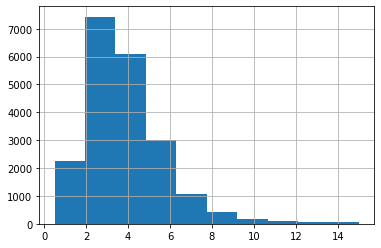

In [8]:
# Graficar el promedio de ingresos
Datos['median_income'].hist()

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

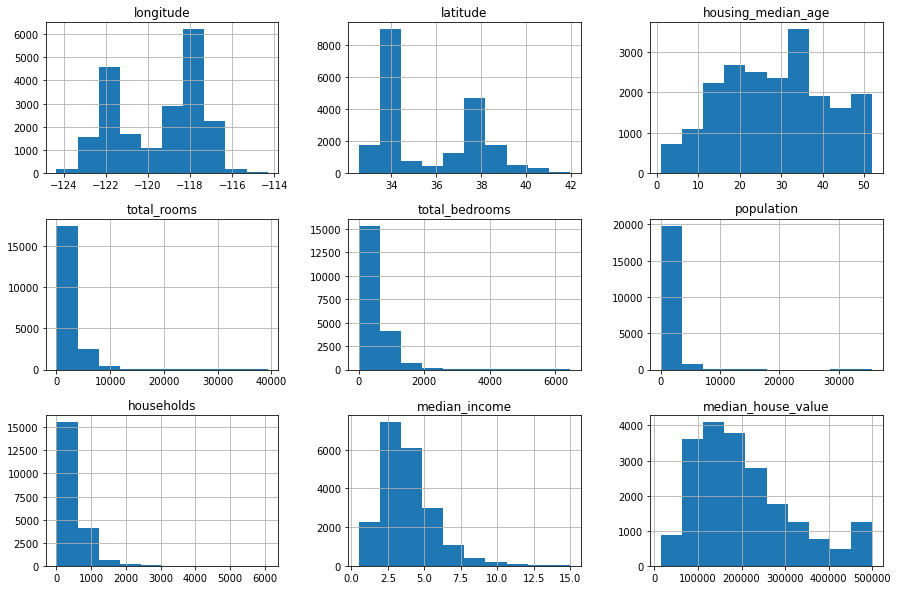

In [9]:
#Graficar todas las variables numericas 
Datos.hist(figsize=(15,10))

#### Mapa de California

<img src="figuras/CaliforniaMapa.png" align="middle" style="width:550px;" />

### Mapa de California (Sin Folium)

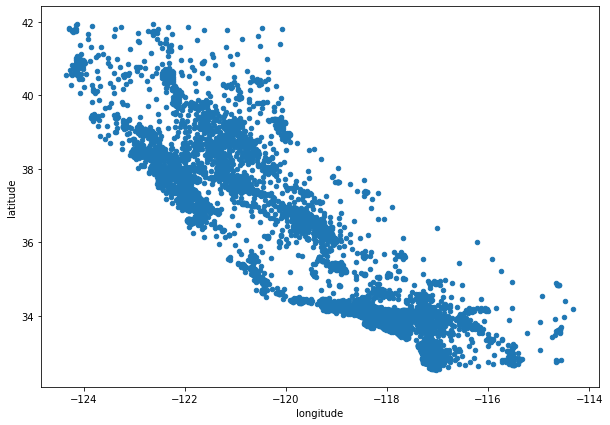

In [10]:
# Hacer una grafica de dispersión con la longitud en X y la latitud en Y.
Datos.plot.scatter(x='longitude',
                y='latitude',
                figsize=(10, 7));

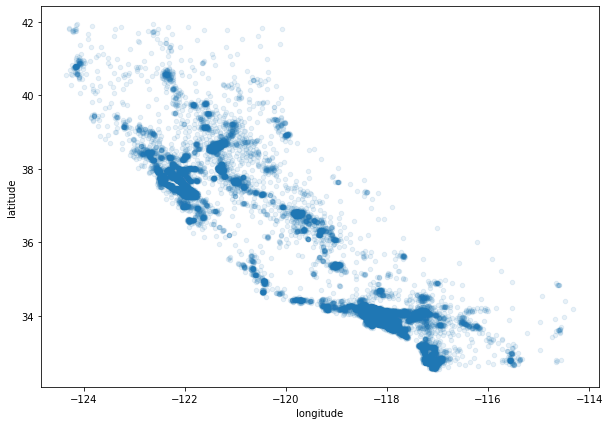

In [11]:
#Agregar alpha=0.1
Datos.plot.scatter(x='longitude',
                y='latitude',
                figsize=(10, 7),
                alpha=0.1);

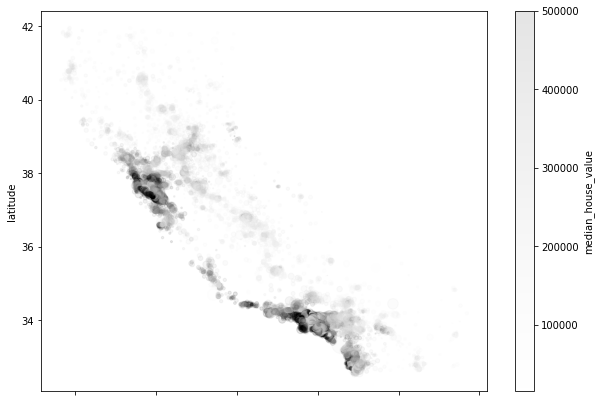

In [12]:
#Cambiar el tamaño del punto y agregar una escala de medición
#s : Tamaño de cada punto
#c : Etiqueta
Datos.plot.scatter(x='longitude', y='latitude', figsize=(10, 7),
                alpha=0.1, s=Datos.population / 100 ,
                c='median_house_value', colorbar=True);

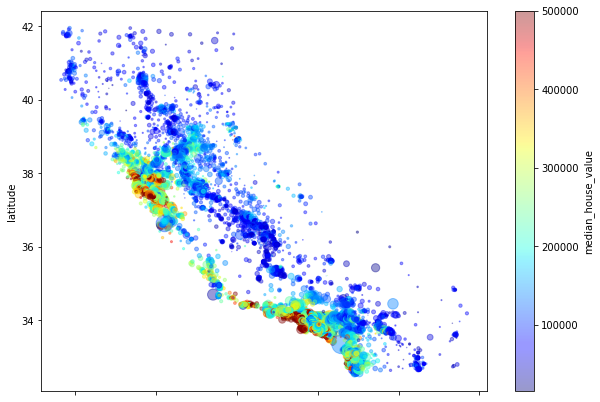

In [13]:
#pip install colorspacious
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
Datos.plot.scatter(x='longitude', y='latitude', figsize=(10, 7),
                alpha=0.4,
                s=Datos.population / 100,
                c='median_house_value',
                cmap=plt.get_cmap('jet'),
                colorbar=True);

### Mapa de California (Con Folium)

In [14]:
#pip install folium
import folium
mapa = folium.Map(location = [37.50, -122.2], zoom_start = 6)
mapa

In [15]:
#Hacer un arreglo llamado 'distritos_loc' que contenga solo la informacion de las coordenadas latitud y longitud
distritos = Datos [ ['latitude', 'longitude'] ].to_numpy()
distritos

array([[  37.88, -122.23],
       [  37.86, -122.22],
       [  37.85, -122.24],
       ...,
       [  39.43, -121.22],
       [  39.43, -121.32],
       [  39.37, -121.24]])

In [16]:
from folium import plugins
from folium.plugins import HeatMap
HeatMap(distritos, radius=15, max_val=0.1, min_opacity=0.4).add_to(mapa)
mapa

C:\Users\flore\AppData\Local\Temp\ipykernel_18456\4107201440.py:3: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(distritos, radius=15, max_val=0.1, min_opacity=0.4).add_to(mapa)


### Correlación de variables

In [17]:
Datos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20630,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20631,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20632,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20633,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

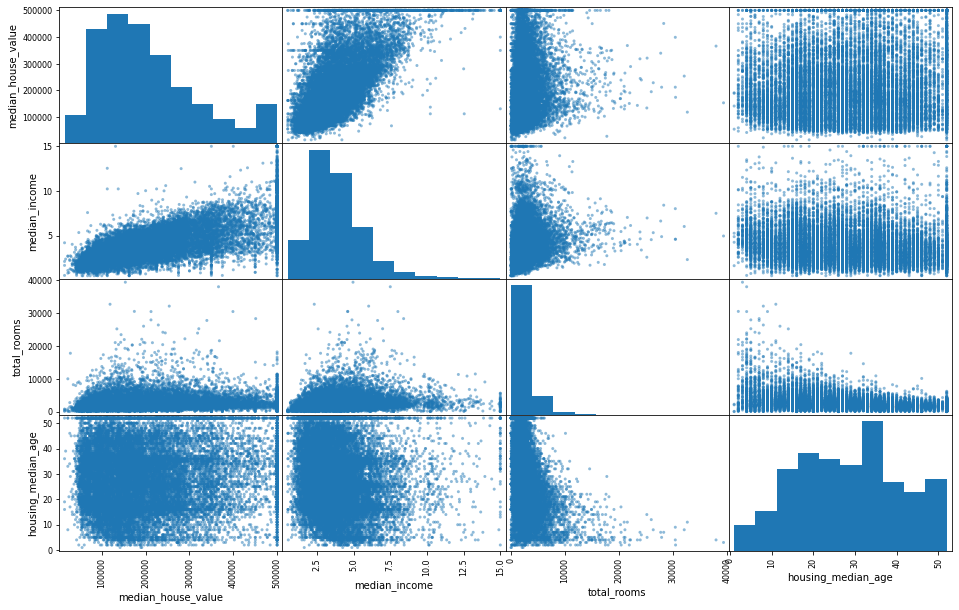

In [18]:
#Hacer diagramas de correlación
# Definir una lista llamada atributos  con las siguientes variables : 
# "median_house_value", "median_income", "total_rooms","housing_median_age"
from pandas.plotting import scatter_matrix
atributos=["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix( Datos[atributos] ,figsize=(16,10))
atributos

In [19]:
# Definir una nueva columna llamada 'bed_rooms_per_room' y asignarle el valor de la division de
# la variables total_bedrooms con total_rooms
Datos['population_per_households']= Datos['population'] / Datos['households']
#Datos

In [20]:
Datos['total_rooms_per_households']= Datos['total_rooms'] / Datos['median_income']
Datos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,population_per_households,total_rooms_per_households
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,2.555556,105.703166
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,2.109842,855.156961
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2.802260,202.138507
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,2.547945,225.762436
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,2.181467,423.014924
...,...,...,...,...,...,...,...,...,...,...,...,...
20630,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2.560606,1067.102480
20631,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,3.122807,272.606383
20632,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2.325635,1325.882353
20633,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2.123209,996.143959


In [21]:
atributos=["median_house_value",
           "median_income",
           "population_per_households",
           "total_rooms",
           "housing_median_age",
           "total_rooms_per_households"]

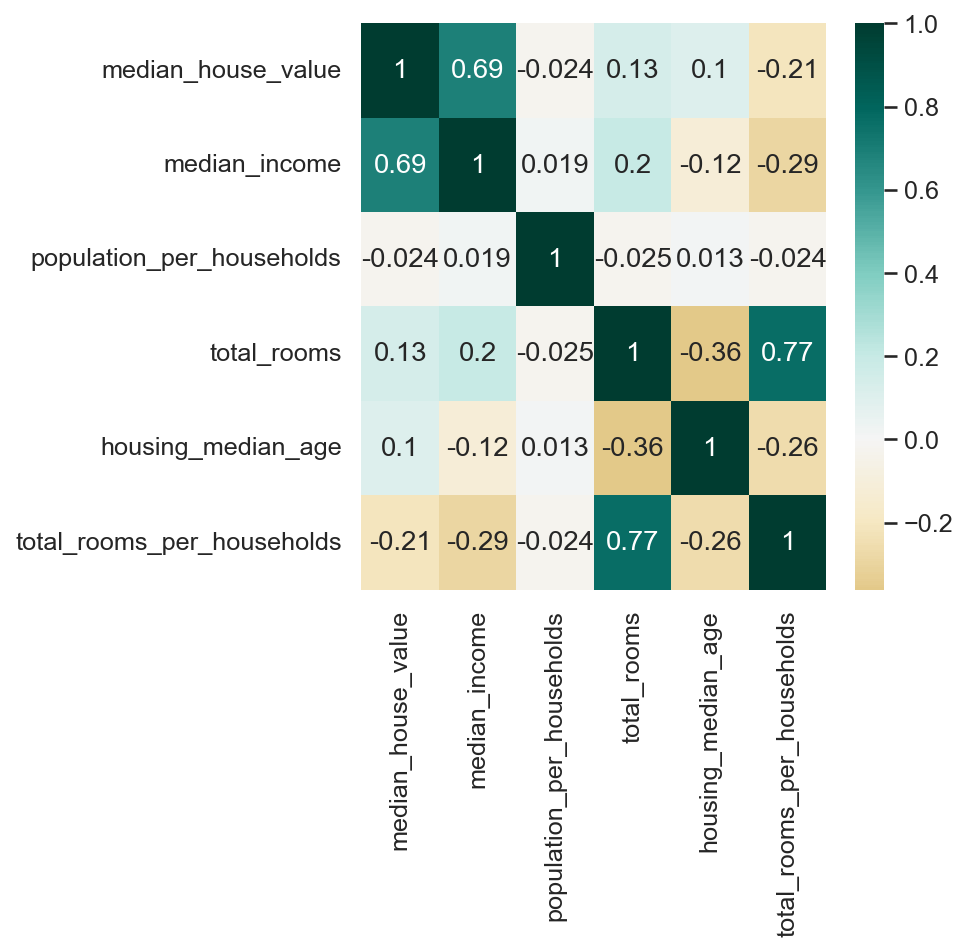

In [22]:
# Matriz correlación númerica y visual
#https://matplotlib.org/tutorials/colors/colormaps.html
#Instalación de seaborn
#pip install seaborn
import seaborn as sns
plt.figure(figsize=(5,5),  dpi = 150)
corrMatrix = Datos[atributos].corr().round(3)
sns.set( font_scale= 1.1 )
sns.heatmap( corrMatrix, annot = True , cmap = 'BrBG', center=0 )
plt.xticks( rotation = 90 )
plt.show()

## 4. Prepare los datos y sus transformadores 

In [23]:
#Revisar si hay datos perdidos NaN
Datos.isnull().any().any()

True

In [24]:
#Número de filas
len(Datos)

20635

In [25]:
# eliminar datos  perdidos NaN
Datos = Datos.dropna()
len(Datos)

20428

In [26]:
len(Datos)

20428

**Tipos de variables**

<img src="figuras/categarical_variables.jpg" align="middle" style="width:550px;" />

In [27]:
# Revisar nuevamente la columna 'ocean_proximity'
Datos['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
Name: ocean_proximity, dtype: int64

In [28]:
#Importamos la funcion OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
nominal_codificador = OneHotEncoder(sparse_output=False)
nominal_codificador.fit_transform(Datos.ocean_proximity.to_frame())


array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [29]:
Datos['ocean_proximity']

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20630      INLAND
20631      INLAND
20632      INLAND
20633      INLAND
20634      INLAND
Name: ocean_proximity, Length: 20428, dtype: object

In [30]:
## Ejemplo codificacion Ordinal
#from sklearn.preprocessing import OrdinalEncoder
#O_codificador = OrdinalEncoder()
#O_codificadir.fit_transform(df[["ocean_proximity"]])
#O_codificadir.categories_



In [31]:
Datos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,population_per_households,total_rooms_per_households
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,2.555556,105.703166
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,2.109842,855.156961
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2.802260,202.138507
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,2.547945,225.762436
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,2.181467,423.014924
...,...,...,...,...,...,...,...,...,...,...,...,...
20630,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2.560606,1067.102480
20631,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,3.122807,272.606383
20632,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2.325635,1325.882353
20633,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2.123209,996.143959


###  ColumnTransformer  y pipeline

<img src="figuras/pipeline.jpg" align="middle" style="width:500px;" />

#### Pipeline

La función pipeline permite juntar varios trasformaciones secuenciales que se requieren ejecutar a un conjunto de datos.

**Pipeline(steps=[('titulo trasnformación1', trasnformación1), ('titulo trasnformación2', trasnformación2),...])**




In [32]:
#Modulos importantes
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [33]:
# Crear la lista de  viriables numericas y categoricas "median_house_value",
# Númericas: 'median_income', 'total_rooms','housing_median_age','bed_rooms_per_room'
# Categoricas: 'ocean_proximity'
#lista_numerica=['median_income', 'total_rooms','housing_median_age','bed_rooms_per_room']
lista_numerica=['median_income', 'total_rooms', 'housing_median_age','population_per_households', 'total_rooms_per_households']
#lista_numerica=['median_income', 'total_rooms', 'housing_median_age', 'total_rooms_per_households']
lista_categorica=['ocean_proximity']

In [34]:
# Crear el pipeline de preprocesamiento para datos numéricos y categóricos.
transformer_num=Pipeline( [ ('scaler', StandardScaler() ) ] )
transformer_cat=Pipeline( [ ('onehot',  OneHotEncoder() ) ] )


#### ColumnTransformer


ColumnTransformer es una clase de scikit-learn que  permite aplicar transformaciones de preparación de datos de forma selectiva.

Por ejemplo,  permite aplicar una transformación específica o secuencia de transformaciones solo a las columnas numéricas, y una secuencia separada de transformaciones solo a las columnas categóricas.

Para usar ColumnTransformer, debe especificar una lista de transformadores.

Cada transformador es una tupla de tres elementos que define el nombre del transformador, la transformación a aplicar y los índices de columna a los que aplicar. Por ejemplo: **(Nombre, objeto, columnas)**

In [35]:
# Definir los transformadores
transformer=ColumnTransformer([('num', transformer_num, lista_numerica) ,
                              ('cat', transformer_cat, lista_categorica) ])

In [36]:
#Tener presente este orden numerico + categotico

### Preparando las muestras de entrenamiento y prueba

<img  align="middle" style="width:550px;" src="figuras/ml_diagrama3.jpg">


División general de los datos
* **X**: Datos  sin la columna "median_house_value""
* **y**: Datos con la columna "median_house_value"

Muestras de entrenamiento y prueba
* **X_train**: este será el grupo de entrenamiento
* **X_test**: este será el  grupo de prueba
* **y_train**: este será el target para el grupo de entrenamiento
* **y_test**: este será el target para el grupo de prueba


In [37]:
# Crear X (Quitar la columna o campo de "median_house_value")
X = Datos.drop("median_house_value", axis=1)
X.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,population_per_households,total_rooms_per_households
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,2.555556,105.703166
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,2.109842,855.156961


In [38]:
# Crear y (Valor de de la columna "median_house_value")
y=Datos['median_house_value']
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20630     78100.0
20631     77100.0
20632     92300.0
20633     84700.0
20634     89400.0
Name: median_house_value, Length: 20428, dtype: float64

In [39]:
# Dividir los datos para entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.8)
X.shape

(20428, 11)

In [40]:
# Revise  el tamaño de cada muestra
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16342, 11), (4086, 11), (16342,), (4086,))

## 5.  Seleccione algunos modelos y realice el entrenamiento (train).


In [41]:
# Llamamos al modelo lineal
from sklearn.linear_model import LinearRegression
linear_regression=LinearRegression()

In [42]:
# Pipeline de la predicción completa.
modelo_linear=Pipeline([ ('transformer', transformer),
                       ('linear_regression',linear_regression)])

In [43]:
modelo_linear.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['median_income',
                                                   'total_rooms',
                                                   'housing_median_age',
                                                   'population_per_households',
                                                   'total_rooms_per_households']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('linear_regression', LinearRegression())])

In [44]:
#Probamos en unas pocas instancias 
muestra = X_test.iloc[:4]
modelo_linear.predict(muestra)

array([145818.27624335, 163054.28500756, 167799.02658878, 289931.52734659])

In [45]:
#Comparamos con los valores reales
list(y_test.iloc[:4])

[89800.0, 142500.0, 126500.0, 266400.0]

#### Cross validation


from sklearn.model_selection import cross_val_score

La validación cruzada o  cross validation  (CV) es una de las técnicas utilizadas para probar la efectividad de los modelos de Machine Learning, también es un procedimiento de remuestreo utilizado para evaluar un modelo si tenemos datos limitados. 

Una manera de obtener las muestras es a traves del metodo del k-fold, el cual divide a los datos en k muestras como se muestra en la imagen (ejemplo con k=5) 

<img src="figuras/cross_validation.jpg" align="middle" style="width:550px;" />
   


In [46]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score
#https://github.com/scikit-learn/scikit-learn/issues/2439

#### Evaluación Linear Regression

In [47]:
# Evaluadar el modelo usando crossvalidation
#https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn.model_selection import cross_val_score
linear_scores = cross_val_score(modelo_linear, X, y, scoring ='neg_mean_squared_error', cv= 5)
linear_scores

array([-7.15689948e+09, -6.82621217e+09, -6.22573068e+09, -6.38216496e+09,
       -5.16167890e+09])

In [48]:
# Cambiamos el signo y sacamos la raiz
np.sqrt(-linear_scores) #rmse Root mean sqrt error 

array([84598.46028019, 82620.89428027, 78903.29956608, 79888.45325608,
       71844.82513302])

In [49]:
#Definimos una función que nos devuelva el score, mean y standard deviation
def display_scores( scores ):
    #print('Scores',scores)
    print('Mean',scores.mean())
    print('Standard Deviation',scores.std())

In [50]:
display_scores( np.sqrt(-linear_scores) )

Mean 79571.18650312917
Standard Deviation 4354.7121679915


### DecisionTree

In [51]:
#Aplicar el modelo de arboles de decision con DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

#1. Nombrar una variable para nuestro modelo
tree_regressor = DecisionTreeRegressor()

In [52]:
#2. Definir el Pipeline : Transformación  + modelo
modelo_tree_regressor=Pipeline([ ('transformer', transformer),
                       ('tree_regressor',tree_regressor)])

In [53]:
#3. Ajustar el modelo
modelo_tree_regressor.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['median_income',
                                                   'total_rooms',
                                                   'housing_median_age',
                                                   'population_per_households',
                                                   'total_rooms_per_households']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('tree_regressor', DecisionTreeRegressor())])

In [54]:
#list(modelo_linear.predict( muestra))

In [55]:
#list(model_tree_regressor.predict( muestra))

In [56]:
#list(y_test.iloc[:4])

In [57]:
#Evaluacion
# 4. Calcular el score con la validación cruzada CV=10
tree_regressor_scores=cross_val_score(modelo_tree_regressor,
                             X,y ,
                             scoring='neg_mean_squared_error',
                             cv=5)
tree_regressor_scores

array([-7.67026069e+09, -8.19615714e+09, -7.84747790e+09, -9.31331075e+09,
       -7.92012929e+09])

In [58]:
# 5. Realizar el cambio de signo y sacar la raiz
display_scores(  np.sqrt(-tree_regressor_scores))

Mean 90439.85010155092
Standard Deviation 3178.1548404450355


In [59]:
# 6. Mostrar el resultado usando la funcion display_scores
display_scores(  np.sqrt(-tree_regressor_scores))

Mean 90439.85010155092
Standard Deviation 3178.1548404450355


### RandomForest

In [60]:
#Aplicar el modelo RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import RandomForestRegressor

In [61]:
#1. Nombrar una variable para nuestro modelo
forest_regressor = RandomForestRegressor()

In [62]:
#2. Definir el Pipeline : Transformación  + modelo
modelo_forest_regressor=Pipeline([ ('transformer', transformer),
                       ('forest_regressor',forest_regressor)])

In [63]:
#3. Ajustar el modelo
modelo_forest_regressor.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['median_income',
                                                   'total_rooms',
                                                   'housing_median_age',
                                                   'population_per_households',
                                                   'total_rooms_per_households']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('forest_regressor', RandomForestRegressor())])

In [65]:
#Evaluacion
# 4. Calcular el score con la validación cruzada CV=10
forest_regressor_scores=cross_val_score( modelo_forest_regressor,
                             X,y ,
                             scoring='neg_mean_squared_error',
                             cv=5)
forest_regressor_scores

array([-4.54895935e+09, -4.93061350e+09, -4.24547950e+09, -5.38219624e+09,
       -4.55941622e+09])

In [66]:
# 5. Realizar el cambio de signo y sacar la raiz
display_scores(  np.sqrt(-forest_regressor_scores))

Mean 68741.70950645949
Standard Deviation 2812.531883993397


In [67]:
# 6. Mostrar el resultado usando la funcion display_scores
display_scores(  np.sqrt(-linear_scores))
display_scores(  np.sqrt(-tree_regressor_scores))
display_scores(  np.sqrt(-forest_regressor_scores))

Mean 79571.18650312917
Standard Deviation 4354.7121679915
Mean 90439.85010155092
Standard Deviation 3178.1548404450355
Mean 68741.70950645949
Standard Deviation 2812.531883993397


#### Resumen

| Modelo o clasificador   |  Mean | Standard deviation  |
|---|---|---|
|  Linear Regression  |  79571.18650312917  |   4354.7121679915    |
|   DecisionTree |  91071.34128231635  |     3520.2420548654886   |
|  Random Forest   | 68731.14503998411  |    2856.6613089393272    |


In [68]:
# Datos de evalación
list_model = ['Linear Regression', 'DecisionTree', 'Random Forest']
list_mean = [79571.2, 91071.34, 68731.14]
list_sd = [4354.71, 3520.24, 2856.66]

C:\Users\flore\AppData\Local\Temp\ipykernel_18456\896272326.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which = 'major', color = '#666666', linestyle = '-')
C:\Users\flore\AppData\Local\Temp\ipykernel_18456\896272326.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which = 'minor', color = '#999999', linestyle = '-', alpha = 0.2)


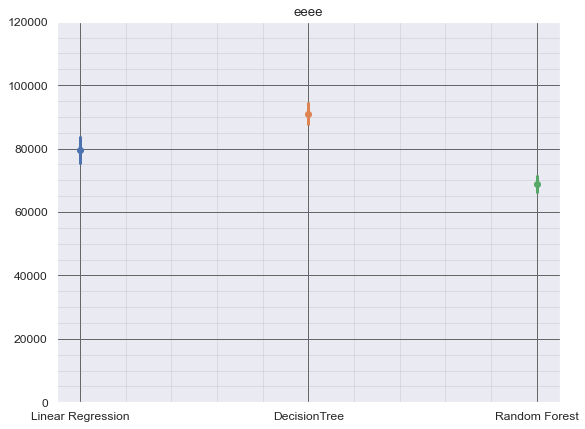

In [83]:
# Agregamos una grafica para comparar visualmente los resultados
plt.figure(figsize =(9,7))
for i in range(3):
    plt.errorbar(i,list_mean[i], xerr=0, yerr=list_sd[i], fmt='o', linewidth=3)
#plt.xticks([0, 1, 2], list_model)
#plt.xticks(np.arange(3), list_model) 
plt.xticks([0, 1, 2], list_model)
plt.title('eeee')
plt.ylim(0,120000)
plt.grid(b=True, which = 'major', color = '#666666', linestyle = '-')
plt.minorticks_on()
plt.grid(b=True, which = 'minor', color = '#999999', linestyle = '-', alpha = 0.2)
plt.show()

## 6 .  Afina(fine tune) el modelo RandomForest


In [122]:
# Utilizamos la función GridSearchCV para encontrar los valores optimos
from sklearn.model_selection import GridSearchCV

In [123]:
#Definición de posibles parametros
n_estimators=[3, 10, 30,50 , 80,100]
min_samples_split=[2,4,6,8]
max_depth=[2,4,6,8,10]

parametros = {'forest_regressorr__n_estimators':n_estimators,
             'forest_regressor__min_samples_split':min_samples_split,
             'forest_regressor__max_depth':max_depth}
parametros

{'forest_regressorr__n_estimators': [3, 10, 30, 50, 80, 100],
 'forest_regressor__min_samples_split': [2, 4, 6, 8],
 'forest_regressor__max_depth': [2, 4, 6, 8, 10]}

In [112]:
#Definicion del grid de busqueda
grid = GridSearchCV(modelo_forest_regressor, param_grid=parametros,
                   cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

In [113]:
# Ajuste del modelo usando todas las posibles combinaciones de parametros 
grid.fit(X,y)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


ValueError: Invalid parameter 'forest_regressorr' for estimator Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['median_income',
                                                   'total_rooms',
                                                   'housing_median_age',
                                                   'population_per_households',
                                                   'total_rooms_per_households']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('forest_regressor', RandomForestRegressor())]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [115]:
# Mostrar la mejor combinación
grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

**Encontramos los nuevos valores de la media y desviación estándar**


In [116]:
#1 Ajustar el modelo con los nuevos parametros 
forest_regressor_tunned=RandomForestRegressor(max_depth=10,
                                    min_samples_split=8 ,
                                   n_estimators = 100 )

In [117]:
#2. Definir el Pipeline : Transformación  + modelo
model_forest_tuned=Pipeline([ ('transformer', transformer),
         ('forest_regressor_tunned',forest_regressor_tunned)])

In [118]:
#3. Ajustar el modelo
model_forest_tuned.fit(X_train, y_train)


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['median_income',
                                                   'total_rooms',
                                                   'housing_median_age',
                                                   'population_per_households',
                                                   'total_rooms_per_households']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('forest_regressor_tunned',
                 RandomForestRegressor(max_depth=10, min_samples_split=8))])

In [119]:
print(list(model_forest_regressor.predict( muestra  )))
print(list(model_forest_tuned.predict( muestra  )))
print(list(y_test.iloc[:4]))

NameError: name 'model_forest_regressor' is not defined

In [120]:
#Evaluacion
# 4. Calcular el score con la validación cruzada CV=10
forest_tuned_scores = cross_val_score(dodel_forest_tunea,
                                     X, y,
                                     scoring = 'neg_mean_squared_error',
                                     cv = 5)

NameError: name 'dodel_forest_tunea' is not defined

In [121]:
# 5. Realizar el cambio de signo y sacar la raiz



In [74]:
# 6. Mostrar el resultado usando la funcion display_scores


#### Extra 1 : Random grid

In [75]:
#Definición de posibles parametros
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(3, 30, num = 3)]
min_samples_split = [2,3,4,5,6 ]
min_samples_leaf = [1, 2, 3,4,5,6 ]

params_grid = {'forest_reg__n_estimators': n_estimators,
               'forest_reg__max_features': max_features,
               'forest_reg__max_depth': max_depth,
               'forest_reg__min_samples_split': min_samples_split,
               'forest_reg__min_samples_leaf': min_samples_leaf
              }

print(params_grid)

{'forest_reg__n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'forest_reg__max_features': ['auto', 'sqrt'], 'forest_reg__max_depth': [3, 16, 30], 'forest_reg__min_samples_split': [2, 3, 4, 5, 6], 'forest_reg__min_samples_leaf': [1, 2, 3, 4, 5, 6]}


In [76]:
#Modulo RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

gridRandom_forest= RandomizedSearchCV(estimator = model_forest_reg, 
                               param_distributions = params_grid, n_iter = 5, cv = 10,
                               random_state=42,n_jobs = -1,verbose=10)

NameError: name 'model_forest_reg' is not defined

In [ ]:
# Ajuste del modelo usando aleatoriamente algunas iteraciones
gridRandom_forest.fit(X, y)

In [ ]:
# Mejores parametros encontrados
gridRandom_forest.best_params_

#### Extra 2: Ranking de parámetros

In [ ]:
#Puntaje de las variables
ranking= (grid.best_estimator_.named_steps["forest_reg"].feature_importances_).tolist()
ranking

In [ ]:
sum(ranking)

In [ ]:
numeric_list

In [ ]:
categorical_list_ocean_proximity = Nominal_codificador.categories_[0].tolist()
categorical_list_ocean_proximity 

In [ ]:
list_atributos=numeric_list+categorical_list_ocean_proximity
list_atributos

In [ ]:
[(ranking[i], list_atributos[i])  for i in range(len(ranking))]

### Análisis final 

In [ ]:
# Datos de evaluación


In [ ]:
# Agregamos una grafica para comparar visualmente los resultados
